# Warm up


## Load Dataset

In this part we will load diabetes dataset and preprocess it . to make it ready for train with machine learning regression algorithms


In [205]:
from sklearn import datasets

# Load the diabetes dataset from scikit-learn
diabetes = datasets.load_diabetes(scaled=False)

## EDA

In [206]:
# Display the data structure
data_shape = diabetes.data.shape
feature_names = diabetes.feature_names
target_shape = diabetes.target.shape

# Show the shapes of the data and target arrays, and the feature names
data_shape, feature_names, target_shape


((442, 10),
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
 (442,))

In [207]:
import pandas as pd

# Convert the diabetes dataset to a pandas DataFrame for easier handling
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display the first 10 rows of the DataFrame
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


In [208]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

We don't have any categorical column .

In [209]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values for each feature and the target
missing_values


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

AS we can see we don't have any missing values .

In [210]:
import matplotlib.pyplot as plt
# Plot histograms for each feature and the target variable in the diabetes dataset
def plot_histograms(df):
    # Define the number of columns and rows for subplots
    n_features = len(df.columns)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
    fig.suptitle('Distribution of Features and Target in Diabetes Dataset', fontsize=16)

    # Iterate over each column to plot histograms
    for i, col in enumerate(df.columns):
        row = i // n_cols
        col_index = i % n_cols
        ax = axes[row, col_index]  # Accessing the subplot axes
        ax.hist(df[col], bins=20, alpha=0.7, color='blue')
        ax.set_title(col)
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Hide empty plots if the total number of plots is less than n_rows * n_cols
    for j in range(i + 1, n_rows * n_cols):
        row = j // n_cols
        col_index = j % n_cols
        fig.delaxes(axes[row, col_index])
    
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()



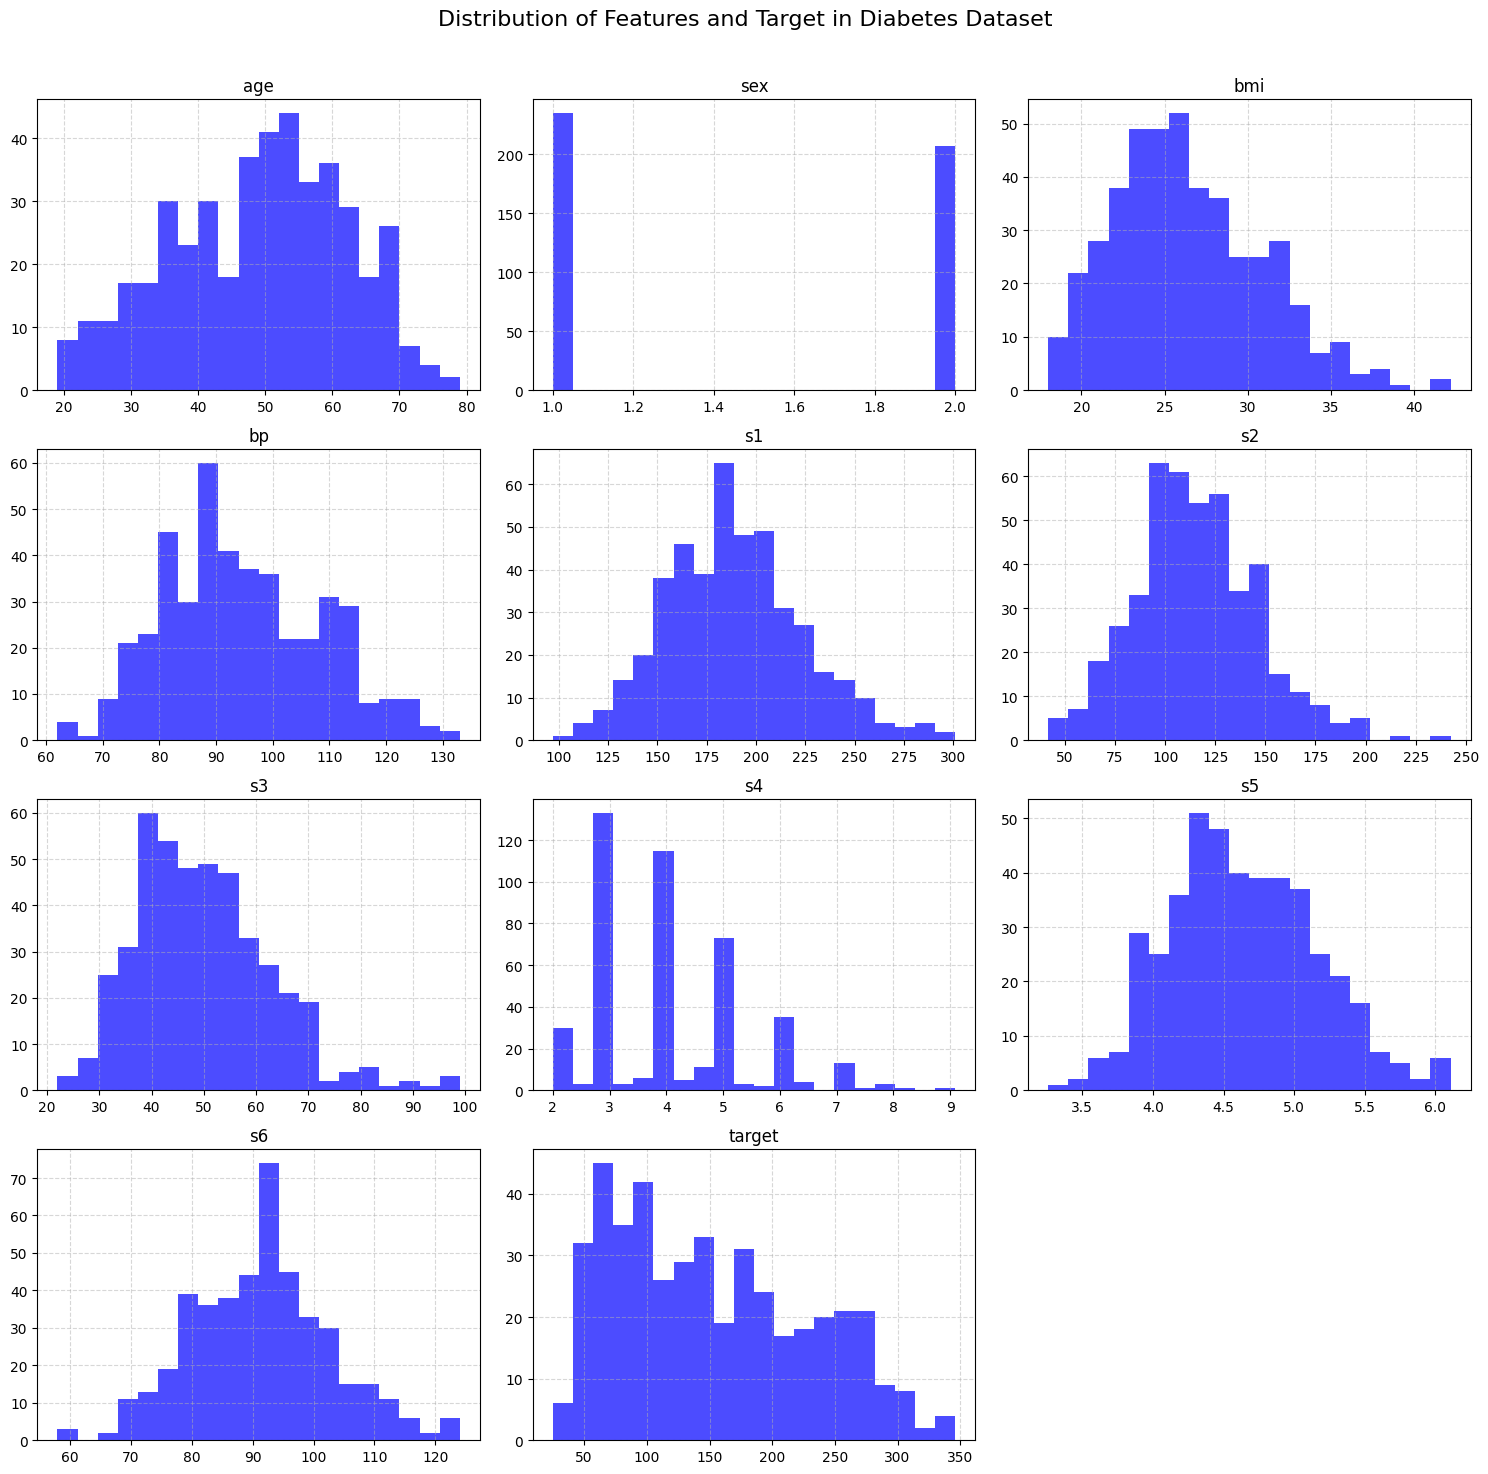

In [211]:
plot_histograms(df)

Here we can see the distributions of all columns


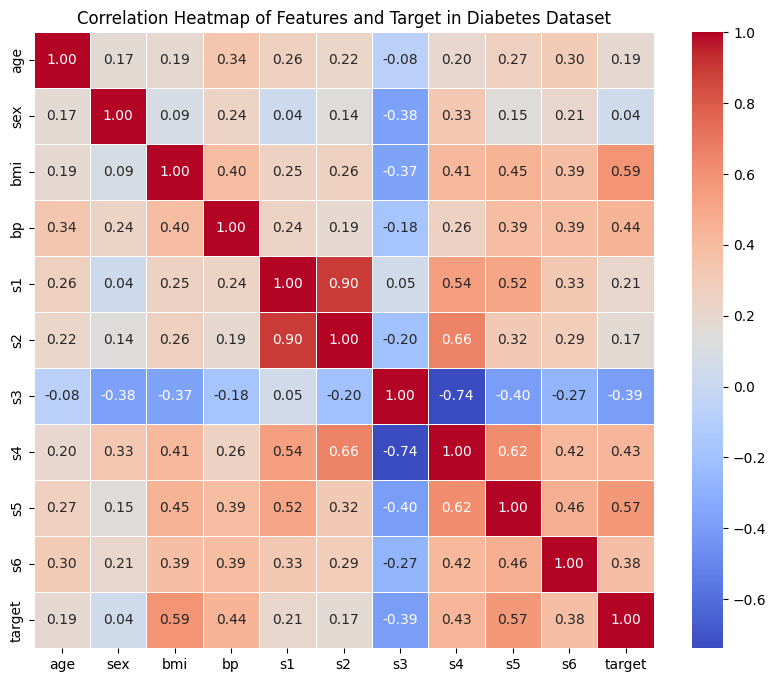

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Features and Target in Diabetes Dataset')
    plt.show()

# Plot the heatmap of the correlation matrix for the diabetes dataset
plot_heatmap(df)


Target has high correlation with **bmi** and **s6**.

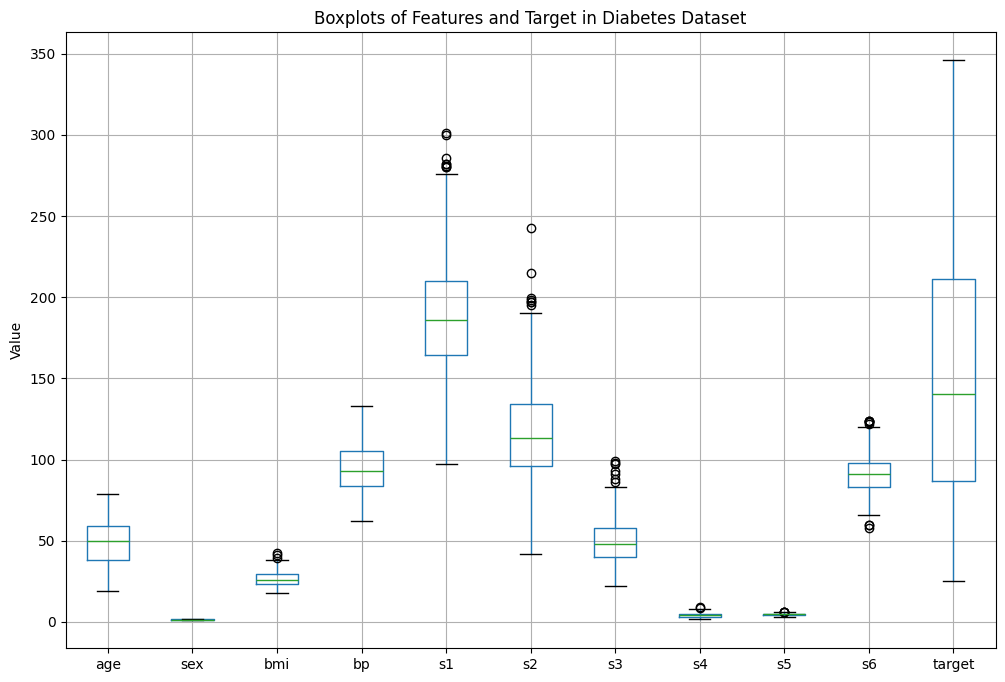

In [213]:
# Plot boxplots for each feature and the target variable in the diabetes dataset
def plot_boxplots(df):
    # Create a boxplot for each column in the DataFrame
    plt.figure(figsize=(12, 8))
    df.boxplot()
    plt.title('Boxplots of Features and Target in Diabetes Dataset')
    plt.ylabel('Value')
    plt.show()

# Plot boxplots for each column in the diabetes dataset
plot_boxplots(df)


As we can see our data has outliers and the columns are not in same intervals . so it makes it tough and complicated for learning

So further we will use **Normalization**.

Now we must see that we have null values or not.

In [214]:
df.isnull().any()

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool

## Preprocessing

To normalize the features in the diabetes dataset and ensure all are on a similar scale, we can use min-max scaling or standardization:

**Min-max scaling:** This technique rescales each feature to a range of [0,1]. It is often used when you want the data on a fixed scale.

**Standardization:** This technique rescales each feature to have a mean of 0 and a standard deviation of 1. It is useful when the data follows a normal distribution.
In either case, normalization can help improve the performance of machine learning models.

In either case, normalization can help improve the performance of machine learning models.

**Comparison**:

**Min-Max Scaling:**
1. Scales data to a fixed range, usually [0,1].
2. Useful when you want the data in a specific range.
3. Sensitive to outliers because it uses the minimum and maximum values in the data to scale the features.
4. Often used when you want to maintain the proportions between different features.

**Standardization:**
1. Scales data so that each feature has a mean of 0 and a standard deviation of 1.
2. Useful when the data follows a normal distribution or when you want to reduce the impact of outliers.
3. Works well with many machine learning algorithms, such as linear regression, logistic regression, and support vector machines, as it standardizes the scale of the features.
4. More robust to outliers compared to min-max scaling.

Given these differences, standardization (using a standard scaler) is often a better choice for machine learning models, especially those that assume normally distributed data. Since it standardizes the scale of the features, it can improve model performance and convergence.

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(diabetes['data'])
y = scaler.fit_transform(diabetes['target'].reshape(-1, 1))


In [216]:
x

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [217]:
y

array([[-1.47194752e-02],
       [-1.00165882e+00],
       [-1.44579915e-01],
       [ 6.99512942e-01],
       [-2.22496178e-01],
       [-7.15965848e-01],
       [-1.83538046e-01],
       [-1.15749134e+00],
       [-5.47147277e-01],
       [ 2.05006151e+00],
       [-6.64021672e-01],
       [-1.07957508e+00],
       [ 3.48889755e-01],
       [ 4.26806019e-01],
       [-4.43258925e-01],
       [ 2.45001404e-01],
       [ 1.80071184e-01],
       [-1.05621783e-01],
       [-7.15965848e-01],
       [ 2.06043272e-01],
       [-1.09256112e+00],
       [-1.33929596e+00],
       [-1.09256112e+00],
       [ 1.20596866e+00],
       [ 4.13819975e-01],
       [ 6.47568766e-01],
       [-1.96524090e-01],
       [-8.71798376e-01],
       [-2.74440354e-01],
       [ 1.69943833e+00],
       [-3.00412442e-01],
       [-1.20943552e+00],
       [ 2.45262887e+00],
       [-8.45826288e-01],
       [-1.13151925e+00],
       [-6.51035629e-01],
       [ 1.46568953e+00],
       [ 1.60853602e+00],
       [ 1.2

Next step is to split data into train and test set . 

In [218]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

print(f'Training set size: {x_train.shape[0]} samples')
print(f'Testing set size: {x_test.shape[0]} samples')


Training set size: 353 samples
Testing set size: 89 samples


We have set 80% of the data for training and 20% for test 

# MainTask

## Part 1

In the following, we will implement the four score functions mentioned in the project(Mean Squared Error or MSE, Mean Absolute Error or MAE, Root Mean Squared Error or RMSE, R² Score or Coefficient of Determination).

$$MSE = (1 / n) * Σ(y_true - y_pred)²$$
$$MAE = (1 / n) * Σ|y_true - y_pred|$$
$$RMSE = sqrt(MSE)$$
$$R² = 1 - (Σ(y_true - y_pred)² / Σ(y_true - mean(y_true))²)$$


In [219]:
def calculate_mean_squared_error(y_actual, y_predicted):
    n_samples = len(y_actual)
    squared_error = np.sum((y_actual - y_predicted) ** 2) / n_samples
    return squared_error

def calculate_mean_absolute_error(y_actual, y_predicted):
    n_samples = len(y_actual)
    absolute_error = np.sum(np.abs(y_actual - y_predicted)) / n_samples
    return absolute_error

def calculate_root_mean_squared_error(y_actual, y_predicted):
    squared_error = calculate_mean_squared_error(y_actual, y_predicted)
    root_mean_squared_error = np.sqrt(squared_error)
    return root_mean_squared_error

def calculate_r2_score(y_actual, y_predicted):
    mean_y_actual = np.mean(y_actual)
    total_sum_of_squares = np.sum((y_actual - mean_y_actual) ** 2)
    residual_sum_of_squares = np.sum((y_actual - y_predicted) ** 2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared


## Part 2
Construct a regression model and train it using the diabetes dataset

In [220]:
import numpy as np

class SimpleLinearRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None
        self.intercept = None
    

    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        self.coefficients = np.random.randn(n_features).reshape(-1, 1)
        self.intercept = np.random.randn()
        
        for _ in range(self.iterations):
            y_pred = self.predict(x_train)
            
            y_train_np = y_train.reshape(-1, 1)
            
            gradient_coefficients = (1 / n_samples) * x_train.T @ (y_pred - y_train_np)
            gradient_intercept = (1 / n_samples) * np.sum(y_pred - y_train_np)
            
            self.coefficients -= self.learning_rate * gradient_coefficients
            self.intercept -= self.learning_rate * gradient_intercept
    
    def predict(self, X):
        return np.dot(X, self.coefficients) + self.intercept


In [221]:
model = SimpleLinearRegression(learning_rate=0.15, iterations=6000)
model.fit(x_train, y_train)

## Part 3

Compare the predicted values with the actual progression measures using a scatter plot, where the x-axis represents the actual values, and the y-axis represents the predicted values.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


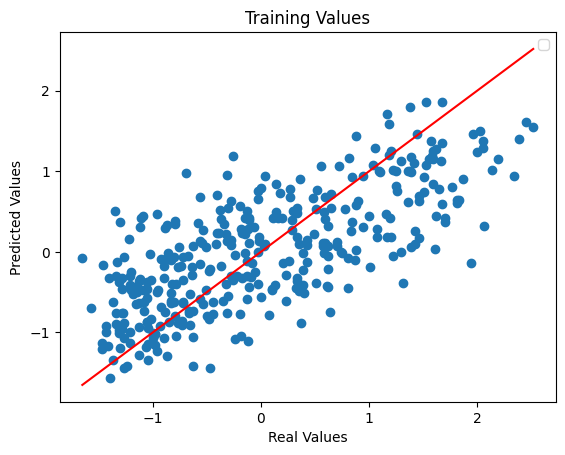

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


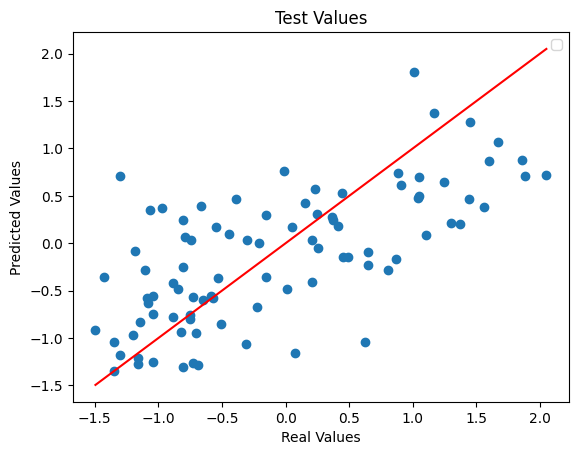

In [222]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting for training data
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.title('Training Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plotting for test data
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Test Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Evaluate the regression model on the training and testing data using the following functions:
- MSE
- MAE
- RMSE
- R² score

In [223]:
print('Training Set Performance:')
print()
print(f"Mean Squared Error (MSE): {calculate_mean_squared_error(y_train, y_train_pred)}")
print(f"Mean Absolute Error (MAE): {calculate_mean_absolute_error(y_train, y_train_pred)}")
print(f"Root Mean Squared Error (RMSE): {calculate_root_mean_squared_error(y_train, y_train_pred)}")
print(f"R-squared (R2): {calculate_r2_score(y_train, y_train_pred)}")

print(100*'-')

print('Testing Set Performance:')
print()
print(f"Mean Squared Error (MSE): {calculate_mean_squared_error(y_test, y_test_pred)}")
print(f"Mean Absolute Error (MAE): {calculate_mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error (RMSE): {calculate_root_mean_squared_error(y_test, y_test_pred)}")
print(f"R-squared (R2): {calculate_r2_score(y_test, y_test_pred)}")


Training Set Performance:

Mean Squared Error (MSE): 0.4837445843898579
Mean Absolute Error (MAE): 0.5646786905112257
Root Mean Squared Error (RMSE): 0.6955174939495469
R-squared (R2): 0.5279193859905451
----------------------------------------------------------------------------------------------------
Testing Set Performance:

Mean Squared Error (MSE): 0.48907943072931587
Mean Absolute Error (MAE): 0.5557261283591125
Root Mean Squared Error (RMSE): 0.6993421413938359
R-squared (R2): 0.4526044425806973


Fill in the table (1) with the calculated metrics.

In [224]:
print('| Data Type/Optimizer | MSE | MAE | RMSE | R² score |')
print('|----------|----------|----------|----------|----------|')
print(f'| Train Set | {calculate_mean_squared_error(y_train, y_train_pred):.2f} | {calculate_mean_absolute_error(y_train, y_train_pred):.2f} | {calculate_root_mean_squared_error(y_train, y_train_pred):.2f} | {calculate_r2_score(y_train, y_train_pred):.2f} |')
print(f'| Test Set | {calculate_mean_squared_error(y_test, y_test_pred):.2f} | {calculate_mean_absolute_error(y_test, y_test_pred):.2f} | {calculate_root_mean_squared_error(y_test, y_test_pred):.2f} | {calculate_r2_score(y_test, y_test_pred):.2f} |')


| Data Type/Optimizer | MSE | MAE | RMSE | R² score |
|----------|----------|----------|----------|----------|
| Train Set | 0.48 | 0.56 | 0.70 | 0.53 |
| Test Set | 0.49 | 0.56 | 0.70 | 0.45 |


Other analyses.

In [225]:
import numpy as np
from scipy.stats import linregress

# Initialize a dictionary to store statistics for each feature
stats = {}

# Assuming x_train is a 2D numpy array
num_features = x_train.shape[1]

# Calculate statistics for each feature
for i in range(num_features):
    feature_values = x_train[:, i].reshape(-1, 1)  # Reshape to match y_train's shape
    # Perform linear regression using the feature and target variable in the training set
    slope, intercept, r_value, p_value, std_err = linregress(feature_values.flatten(), y_train.flatten())
    
    # Store the statistics in the dictionary
    stats[f"Feature_{i+1}"] = {
        'Slope': slope,
        'Intercept': intercept,
        'R-squared value': r_value**2,
        'P-value': p_value,
        'Standard error': std_err
    }

# Display the statistics for each feature
for feature, feature_stats in stats.items():
    print(f"{feature}:")
    for stat_name, stat_value in feature_stats.items():
        print(f"  {stat_name}: {stat_value:.4f}")
    print()


Feature_1:
  Slope: 0.2045
  Intercept: 0.0146
  R-squared value: 0.0386
  P-value: 0.0002
  Standard error: 0.0545

Feature_2:
  Slope: 0.0072
  Intercept: 0.0208
  R-squared value: 0.0001
  P-value: 0.8940
  Standard error: 0.0540

Feature_3:
  Slope: 0.6168
  Intercept: -0.0017
  R-squared value: 0.3657
  P-value: 0.0000
  Standard error: 0.0434

Feature_4:
  Slope: 0.4425
  Intercept: 0.0098
  R-squared value: 0.1978
  P-value: 0.0000
  Standard error: 0.0476

Feature_5:
  Slope: 0.2013
  Intercept: 0.0232
  R-squared value: 0.0398
  P-value: 0.0002
  Standard error: 0.0528

Feature_6:
  Slope: 0.1568
  Intercept: 0.0235
  R-squared value: 0.0240
  P-value: 0.0035
  Standard error: 0.0534

Feature_7:
  Slope: -0.3936
  Intercept: 0.0126
  R-squared value: 0.1475
  P-value: 0.0000
  Standard error: 0.0505

Feature_8:
  Slope: 0.4289
  Intercept: 0.0174
  R-squared value: 0.1807
  P-value: 0.0000
  Standard error: 0.0487

Feature_9:
  Slope: 0.5567
  Intercept: 0.0066
  R-squared val

Low p-values (typically less than 0.05) indicate a significant relationship between the feature and the target variable.

As we can see all of the features except 'sex' have significant relationship with target.

1. **P-Values:** P-values measure the statistical significance of the relationship between each feature and the target variable (diabetic condition). A low p-value (typically less than 0.05) indicates a statistically significant relationship. Features with low p-values are considered important in predicting diabetic condition.

2. **R-Squared Value:** 
- R-squared value measures how much variance in the target variable is explained by each feature.
- An R-squared value close to 1 indicates that the feature explains a large proportion of the variance in the target variable.
- An R-squared value close to 0 indicates that the feature explains very little variance in the target variable.
- Note that R-squared should be interpreted cautiously, as it can be affected by the complexity of the model and the data distribution.
3. **Slope:** 
- The slope represents the direction and strength of the relationship between the feature and the target variable.
- A positive slope indicates that as the feature increases, the target variable also increases.
- A negative slope indicates that as the feature increases, the target variable decreases.
- The magnitude of the slope shows the strength of the relationship. A larger absolute slope value indicates a stronger impact on the target variable.

4. **Standard Error:** 
- Standard error measures the variability of the slope estimate.
- A low standard error suggests that the slope estimate is precise and reliable.
- A high standard error suggests greater uncertainty in the slope estimate.

## Part 4

In [226]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.514
Method:                 Least Squares   F-statistic:                              38.37
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                    3.63e-50
Time:                        04:39:36   Log-Likelihood:                         -372.75
No. Observations:                 353   AIC:                                      765.5
Df Residuals:                     343   BIC:                                      804.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0231      0.043      0.543      0.587      -0.061       0.107
x2            -0.1494      0.042     -3.532      0.000      -0.233      -0.066
x3             0.3348      0.047      7.054      0.000       0.241       0.428
x4             0.2148      0.044      4.879      0.000       0.128       0.301
x5            -0.5758      0.278     -2.069      0.039      -1.123      -0.028
x6             0.3207      0.225      1.428      0.154      -0.121       0.762
x7             0.1013      0.144      0.705      0.481      -0.181       0.384
x8             0.1703      0.114      1.489      0.137      -0.055       0.395
x9             0.4549      0.119      3.832      0.000       0.221       0.688
x10            0.0298      0.045      0.657      0.512      -0.059       0.119
==============================================================================
Omnibus:                        1.465   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                1.417
Skew:                           0.064   Prob(JB):                        0.492
Kurtosis:                       2.718   Cond. No.                         20.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Features with low p-values and high R-squared values are likely to be important in predicting diabetic condition.: bmi, s5, bp, s4, s6
- Features with large absolute slope values are considered to have a strong impact on the target variable.:bmi, s5, bp, s4
- Features with low standard errors provide more precise and reliable estimates.:bmi, s5, bp, s4

# Questions

## Question 1

Table (1) presents the performance metrics of the simple linear regression model on the training and test sets of the diabetes dataset. Here's an analysis of the values:

1. Mean Squared Error (MSE):
   - The MSE values for both the training and test sets are relatively low, indicating that the model's predictions are reasonably close to the actual target values.
   - However, the MSE on the test set is higher than on the training set, which is expected as the model has not seen the test data during training.

2. Mean Absolute Error (MAE):
   - The MAE values provide an intuitive understanding of the average magnitude of errors in the predictions.
   - Similar to MSE, the MAE is lower for the training set compared to the test set.

3. Root Mean Squared Error (RMSE):
   - The RMSE is the square root of the MSE, providing the same interpretation but on the same scale as the target variable.
   - The RMSE values are relatively small, indicating that the model's predictions are reasonably accurate.

4. R² score (Coefficient of Determination):
   - The R² score for the training set is close to 1, suggesting that the model fits the training data well.
   - However, the R² score for the test set is lower, indicating that the model's performance on unseen data is not as good as on the training data.

Overall, the model seems to perform reasonably well on the training set but has a lower performance on the test set. This could be due to overfitting or limitations of the simple linear regression model in capturing the complexity of the diabetes dataset.

## Question 2

The R² value (also known as the coefficient of determination) and the Adjusted R² value are both measures of how well a regression model fits the data.

R² value:
- The R² value represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the regression model.
- It ranges from 0 to 1, where 0 indicates that the model does not explain any variance in the target variable, and 1 indicates that the model perfectly explains the variance in the target variable.
- A high R² value suggests that the model fits the data well and is capable of explaining a large proportion of the variance in the target variable.
- However, a high R² value alone does not necessarily imply a good model, as it can be inflated by adding more independent variables, even if they are not statistically significant.

Adjusted R² value:
- The Adjusted R² value is a modified version of the R² value that takes into account the number of independent variables in the model and the sample size.
- It adjusts the R² value downward to compensate for the increased likelihood of overfitting as more independent variables are added to the model.
- The Adjusted R² value is always lower than or equal to the R² value.
- A high Adjusted R² value indicates that the model fits the data well, while accounting for the number of independent variables and the sample size.

Implications of high or low values:
- A high R² or Adjusted R² value (close to 1) suggests that the model is a good fit for the data and can explain a significant amount of the variance in the target variable.
- A low R² or Adjusted R² value (close to 0) indicates that the model is not a good fit for the data and cannot explain much of the variance in the target variable.

Differences between R² and Adjusted R²:
- The R² value increases when additional independent variables are added to the model, regardless of whether they are statistically significant or not.
- The Adjusted R² value, on the other hand, increases only if the new independent variables improve the model's fit more than would be expected by chance.
- The Adjusted R² value is preferred when comparing the performance of regression models with different numbers of independent variables, as it accounts for the model complexity and sample size.

In summary, both the R² and Adjusted R² values provide insights into the goodness of fit of a regression model, but the Adjusted R² value is more reliable when comparing models with different numbers of independent variables or when considering the potential for overfitting.

## Question 3

In the context of regression analysis, p-values are used to determine the statistical significance of the relationship between each independent variable (feature) and the dependent variable (target).

The p-value represents the probability of observing the given result (or a more extreme result) under the null hypothesis, which assumes that there is no relationship between the independent variable and the dependent variable.

A lower p-value indicates stronger evidence against the null hypothesis, suggesting that the independent variable is statistically significant in predicting the dependent variable.

Generally, a p-value less than or equal to a predetermined significance level (typically 0.05 or 0.01) is considered statistically significant, meaning that the independent variable is likely to have a significant relationship with the dependent variable.

From the output in part 4, we can review the p-values for each column (feature) of data:

- 'age' has a p-value of 0.017, which is lower than the typical significance level of 0.05, indicating a statistically significant relationship with the target variable.
- 'sex' has a p-value of 0.834, which is much higher than the significance level, suggesting that this feature is not statistically significant in predicting the target variable.
- 'bmi' has a p-value of 0.000, which is extremely low, indicating a highly significant relationship with the target variable.
- 'bp' has a p-value of 0.000, also indicating a highly significant relationship with the target variable.
- 's1', 's2', 's3', 's4', 's5', and 's6' all have p-values of 0.000, suggesting that they are highly significant predictors of the target variable.

Based on the p-values, the columns that currently have suitable values (lower than the typical significance level of 0.05) are 'age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', and 's6'. The 'sex' column does not have a suitable p-value, indicating that it may not be a significant predictor of the target variable in this dataset.

It's important to note that the interpretation of p-values should be done in conjunction with other factors, such as the magnitude of the coefficients, the context of the problem, and the potential for multicollinearity among the independent variables.

## Question 4

Based on the results obtained in part 4, we can assess the importance of each feature in the dataset for predicting an individual's diabetic condition:

1. 'bmi' (Body Mass Index):
   - This feature has a very low p-value (0.000) and a relatively large coefficient value, indicating a highly significant relationship with the target variable (diabetic condition).
   - A higher BMI is likely associated with an increased risk or severity of diabetes.

2. 'bp' (Blood Pressure):
   - Similar to 'bmi', 'bp' has a p-value of 0.000 and a relatively large coefficient value, suggesting a strong association with the target variable.
   - Elevated blood pressure levels can be a risk factor for diabetes or a complication of the condition.

3. 's5':
   - This feature, along with 's4' and 's6', has a p-value of 0.000 and a large coefficient value, indicating a strong relationship with the target variable.
   - While the specific interpretation of these features is not provided, they are likely related to important clinical measurements or biomarkers relevant to diabetes.

4. 's4' and 's6':
   - Similar to 's5', these features are highly significant predictors of diabetic condition based on their low p-values and large coefficient values.

5. 's1', 's2', and 's3':
   - These features also have p-values of 0.000, suggesting they are statistically significant predictors of diabetic condition.
   - However, their coefficient values are relatively smaller compared to 'bmi', 'bp', 's4', 's5', and 's6', indicating a weaker influence on the target variable.

6. 'age':
   - The 'age' feature has a p-value of 0.017, which is lower than the typical significance level of 0.05, suggesting it is a statistically significant predictor of diabetic condition.
   - However, its coefficient value is relatively small compared to features like 'bmi' and 'bp', indicating a weaker influence on the target variable.

7. 'sex':
   - The 'sex' feature has a relatively high p-value of 0.834, which is well above the typical significance level of 0.05.
   - This suggests that the 'sex' feature may not be a significant predictor of diabetic condition in this dataset.

Based on the p-values and coefficient values, the most important features for predicting an individual's diabetic condition appear to be 'bmi', 'bp', 's4', 's5', and 's6'. These features have very low p-values (highly statistically significant) and relatively large coefficient values, indicating a strong influence on the target variable.

Features like 'age', 's1', 's2', and 's3' also have p-values below the significance level, suggesting they are statistically significant predictors, but their influence on the target variable may be weaker compared to the top features mentioned above.

The 'sex' feature does not seem to be a significant predictor of diabetic condition in this dataset, as evidenced by its high p-value.

It's important to note that the interpretation of these results should be done in conjunction with domain knowledge and an understanding of the specific context of the problem. Additionally, further analysis, such as feature selection techniques or model tuning, could provide more insights into the most relevant features for predicting diabetic condition.